In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 解題步驟：

1. 將 train.csv, test.csv 合併
2. 取出 LotFrontage, GarageYrBlt, MasVnrArea 三個特徵的資料
3. 分別以平均值及中位數來填補缺失值
4. 分析缺失值，練習繪製直方圖及機率圖 (如下圖)
5. 分別計算原本、以平均值填補、以中位數填補的標準差
6. 課後問答

<img src="./data/hist_plot.png" style="zoom:100%;" />

## Hint

* [pandas.DataFrame.fillna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)
* [seaborn.histplot](


## 讀取資料

In [3]:
""" Your code hear: 讀取 train.csv, test.csv 並合併 """
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
total = pd.concat([train, test], axis = 0)

## 分離目標

In [162]:
# 將目標分析欄位取出來
""" Your code hear: """
target = total[['LotFrontage', 'GarageYrBlt', 'MasVnrArea']]
target.info()

def df_plot(column):
    df_origin = target[[column]]
    df_origin['type'] = 'origin'

    df_mean = target[[column]]
    df_mean[column].fillna(value=df_mean[column].mean(), inplace=True)
    df_mean['type'] = 'mean'

    df_median = target[[column]]
    df_median[column].fillna(value=df_median[column].median(), inplace=True)
    df_median['type'] = 'median'

    df = pd.concat([df_origin, df_mean, df_median], axis=0)   
    return df

LotFrontage = df_plot('LotFrontage')
GarageYrBlt = df_plot('GarageYrBlt')
MasVnrArea= df_plot('MasVnrArea')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 364
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1201 non-null   float64
 1   GarageYrBlt  1379 non-null   float64
 2   MasVnrArea   1452 non-null   float64
dtypes: float64(3)
memory usage: 85.6 KB


/Users/glenn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/glenn/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/Users/glenn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

## 繪圖

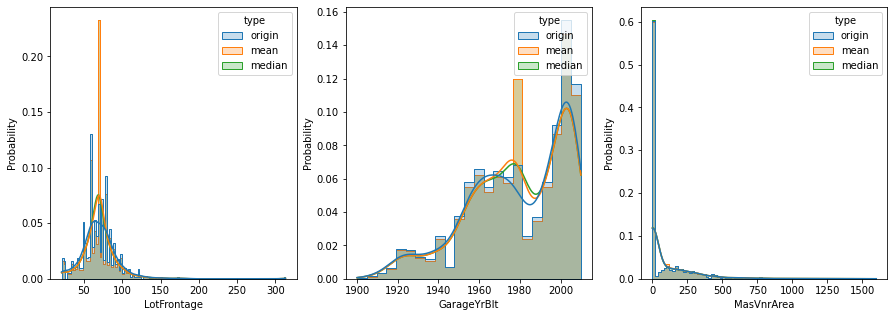

In [163]:
# 繪圖
""" Your code hear: """
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(
    LotFrontage, ax=axes[0], x="LotFrontage", hue="type", element="step", kde=True,
    stat="probability", common_norm=False,
)

sns.histplot(
    GarageYrBlt, ax=axes[1], x="GarageYrBlt", hue="type", element="step", kde=True,
    stat="probability", common_norm=False,
)

sns.histplot(
    MasVnrArea, ax=axes[2], x="MasVnrArea", hue="type", element="step", kde=True,
    stat="probability", common_norm=False,
)

plt.show()

## 分析標準差

In [164]:
""" Your code hear: """
print(LotFrontage[LotFrontage.type == 'origin'].std())
print(LotFrontage[LotFrontage.type == 'mean'].std())
print(LotFrontage[LotFrontage.type == 'median'].std())

LotFrontage    24.284752
dtype: float64
LotFrontage    22.024023
dtype: float64
LotFrontage    22.027677
dtype: float64


In [165]:
print(GarageYrBlt[GarageYrBlt.type == 'origin'].std())
print(GarageYrBlt[GarageYrBlt.type == 'mean'].std())
print(GarageYrBlt[GarageYrBlt.type == 'median'].std())

GarageYrBlt    24.689725
dtype: float64
GarageYrBlt    23.994583
dtype: float64
GarageYrBlt    23.997022
dtype: float64


In [166]:
print(MasVnrArea[MasVnrArea.type == 'origin'].std())
print(MasVnrArea[MasVnrArea.type == 'mean'].std())
print(MasVnrArea[MasVnrArea.type == 'median'].std())

MasVnrArea    181.066207
dtype: float64
MasVnrArea    180.569112
dtype: float64
MasVnrArea    180.731373
dtype: float64


## 透過分析標準差可以得到什麼結果？

平均數補值和中位數補值過後的標準差沒有相差過大，與原圖的分佈相比不會有太大的偏移。